<b>PART-II<b>

<b>Used Arima model for crop price prediction(wheat price of Punjab)<b>

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
fields = ['Modal_Price', 'Price_Date']
df= pd.read_csv("data/wheat.csv",skipinitialspace=True, usecols=fields)

In [6]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

In [7]:
df=df.set_index('Price_Date')

In [8]:
df.head(2)

,Modal_Price
Price_Date,
2010-04-06,1100
2010-04-07,1100


In [9]:
data = df.copy()
y = data

In [10]:
y

,Modal_Price
Price_Date,
2010-04-06,1100
2010-04-07,1100
2010-04-08,1100
2010-04-09,1100
2010-04-10,1100
...,...
2017-05-06,1625
2017-05-09,1625
2017-05-10,1625


In [11]:
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

Price_Date
2010-04-01    1100.0
2010-05-01    1100.0
2010-06-01    1110.0
2010-07-01    1100.0
2010-08-01    1700.0
               ...  
2017-01-01    1625.0
2017-02-01    1625.0
2017-03-01    1625.0
2017-04-01    1625.0
2017-05-01    1625.0
Freq: MS, Name: Modal_Price, Length: 86, dtype: float64


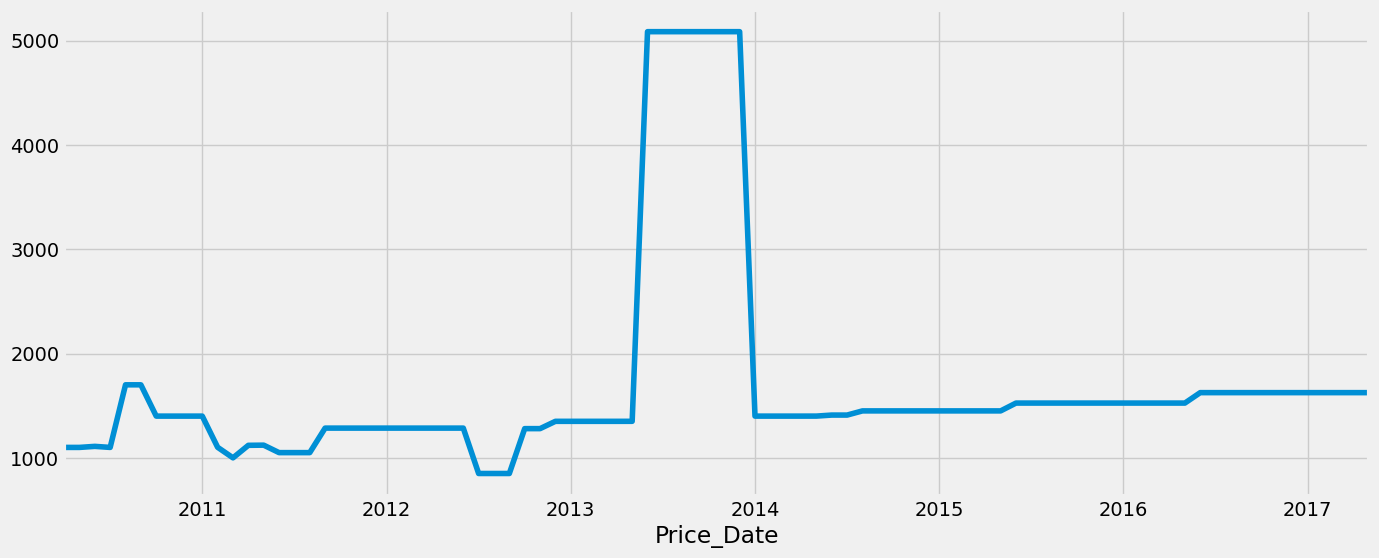

In [12]:
y.plot(figsize=(15, 6))
plt.show()

In [13]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1533.758971632188
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1303.0767817725525
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1293.297991361073
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1061.0000887957863
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1299.7836076632498
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1263.0388577737656
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1091.4892066734997
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1062.8230839574292
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1437.7804822098246
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1224.337441979313
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1223.5501507105485
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1003.5714953139917
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1242.3884573139076
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1198.6128530962374
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1048.4019040394219
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1005.4470254463452
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1310.231304627329
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1135.0027258195

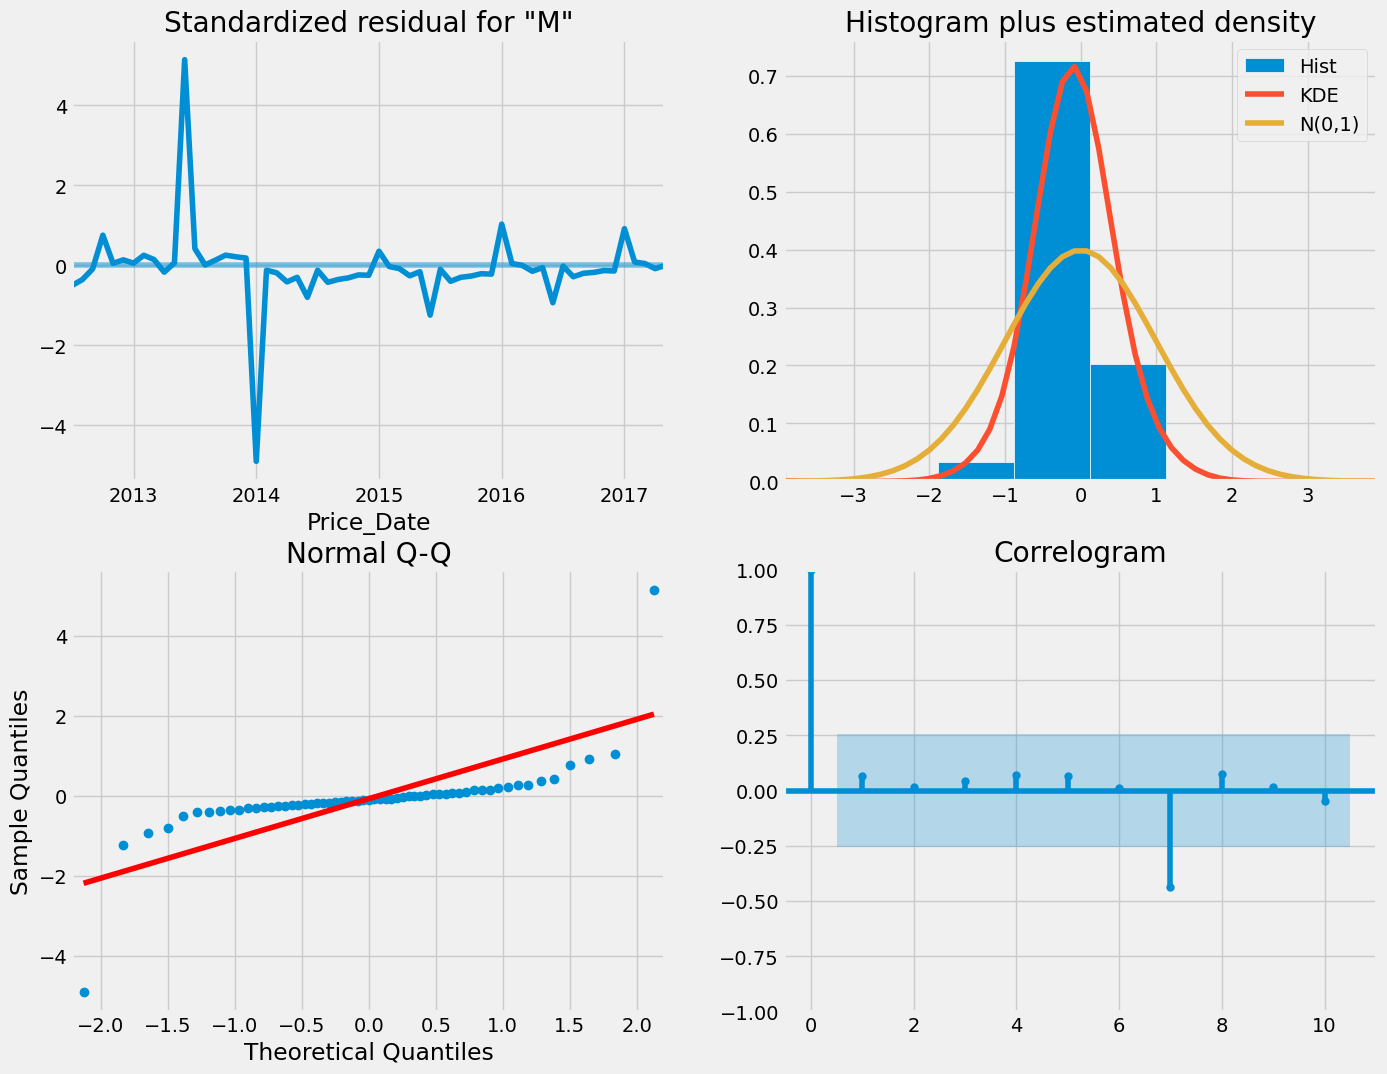

In [15]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

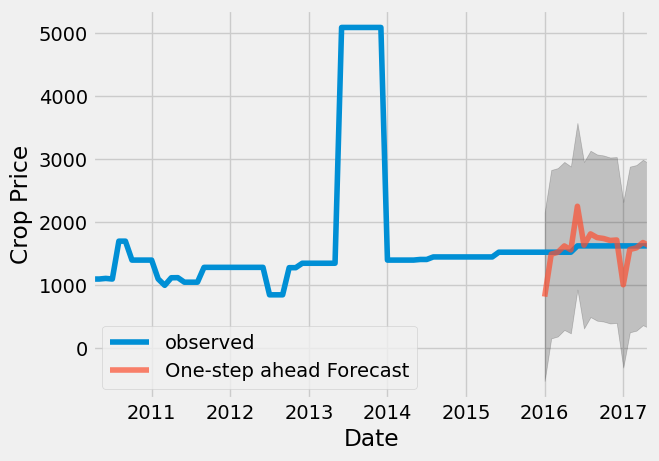

In [17]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 80634.28


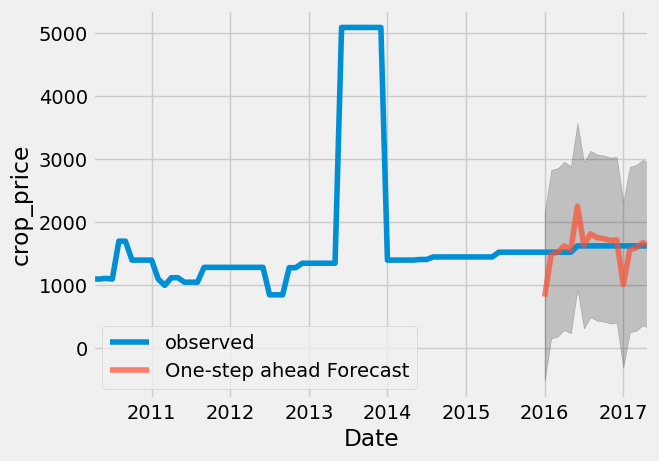

In [19]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('crop_price')
plt.legend()

plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 80634.28


In [21]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

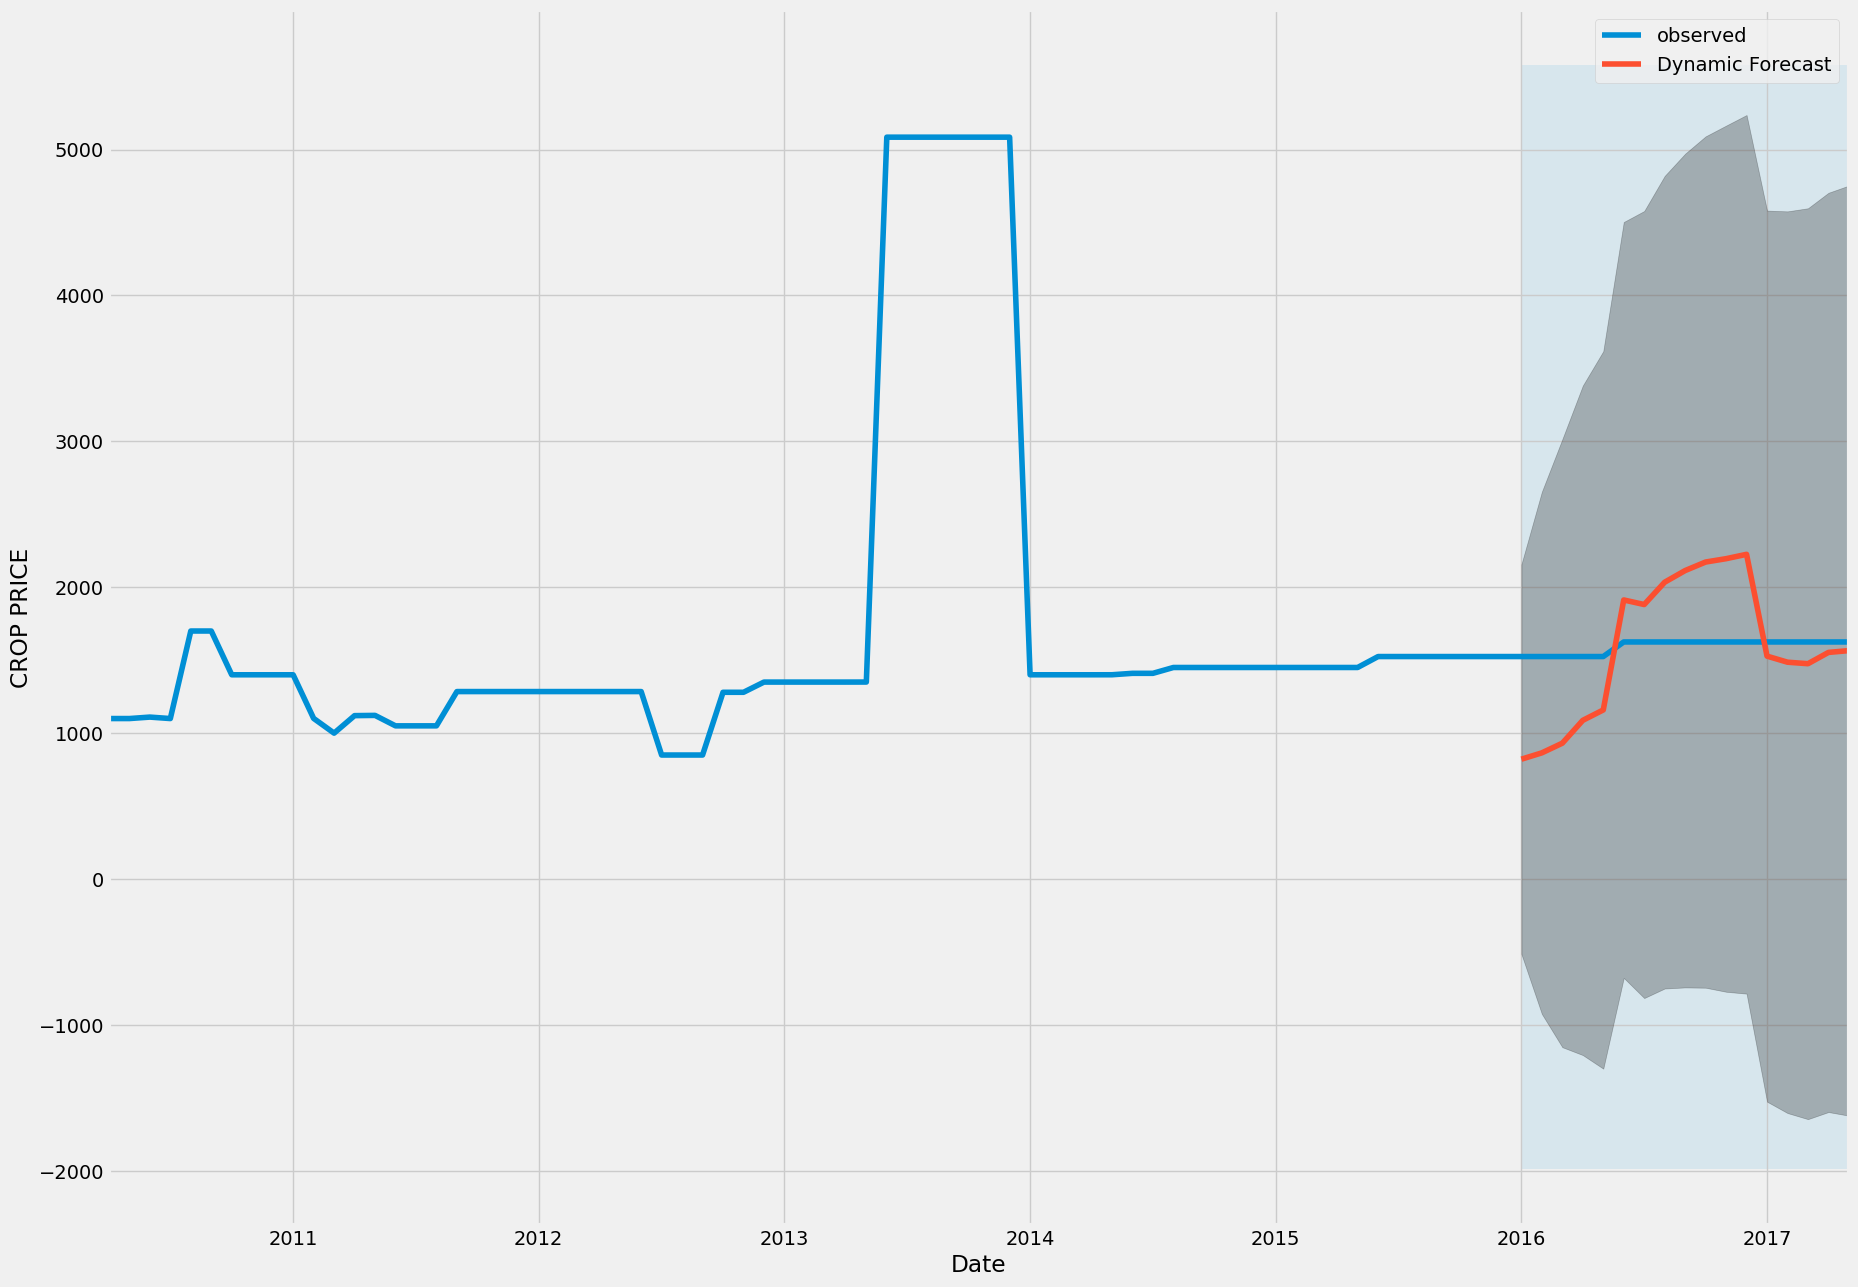

In [22]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()

In [23]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 188871.3


<b>Forecast of 20 steps ahead in future<b>

In [24]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

<b>The predicted prices are:<b>

In [25]:
pred_ci

,lower Modal_Price,upper Modal_Price
2017-06-01,927.262034,3531.698007
2017-07-01,413.514920,3900.511501
2017-08-01,222.208639,4277.309143
2017-09-01,56.189279,4514.779929
2017-10-01,-71.882089,4687.287108
2017-11-01,-191.035311,4798.722290
2017-12-01,-275.212475,4895.127525
2018-01-01,-947.446389,4366.604288
2018-02-01,-1056.157811,4373.907258
2018-03-01,-1126.529358,4398.704986


<b>Save the csv in desired location<b>

In [26]:
pred_ci.to_csv("predicted_data/predicted_wheat_price.csv")

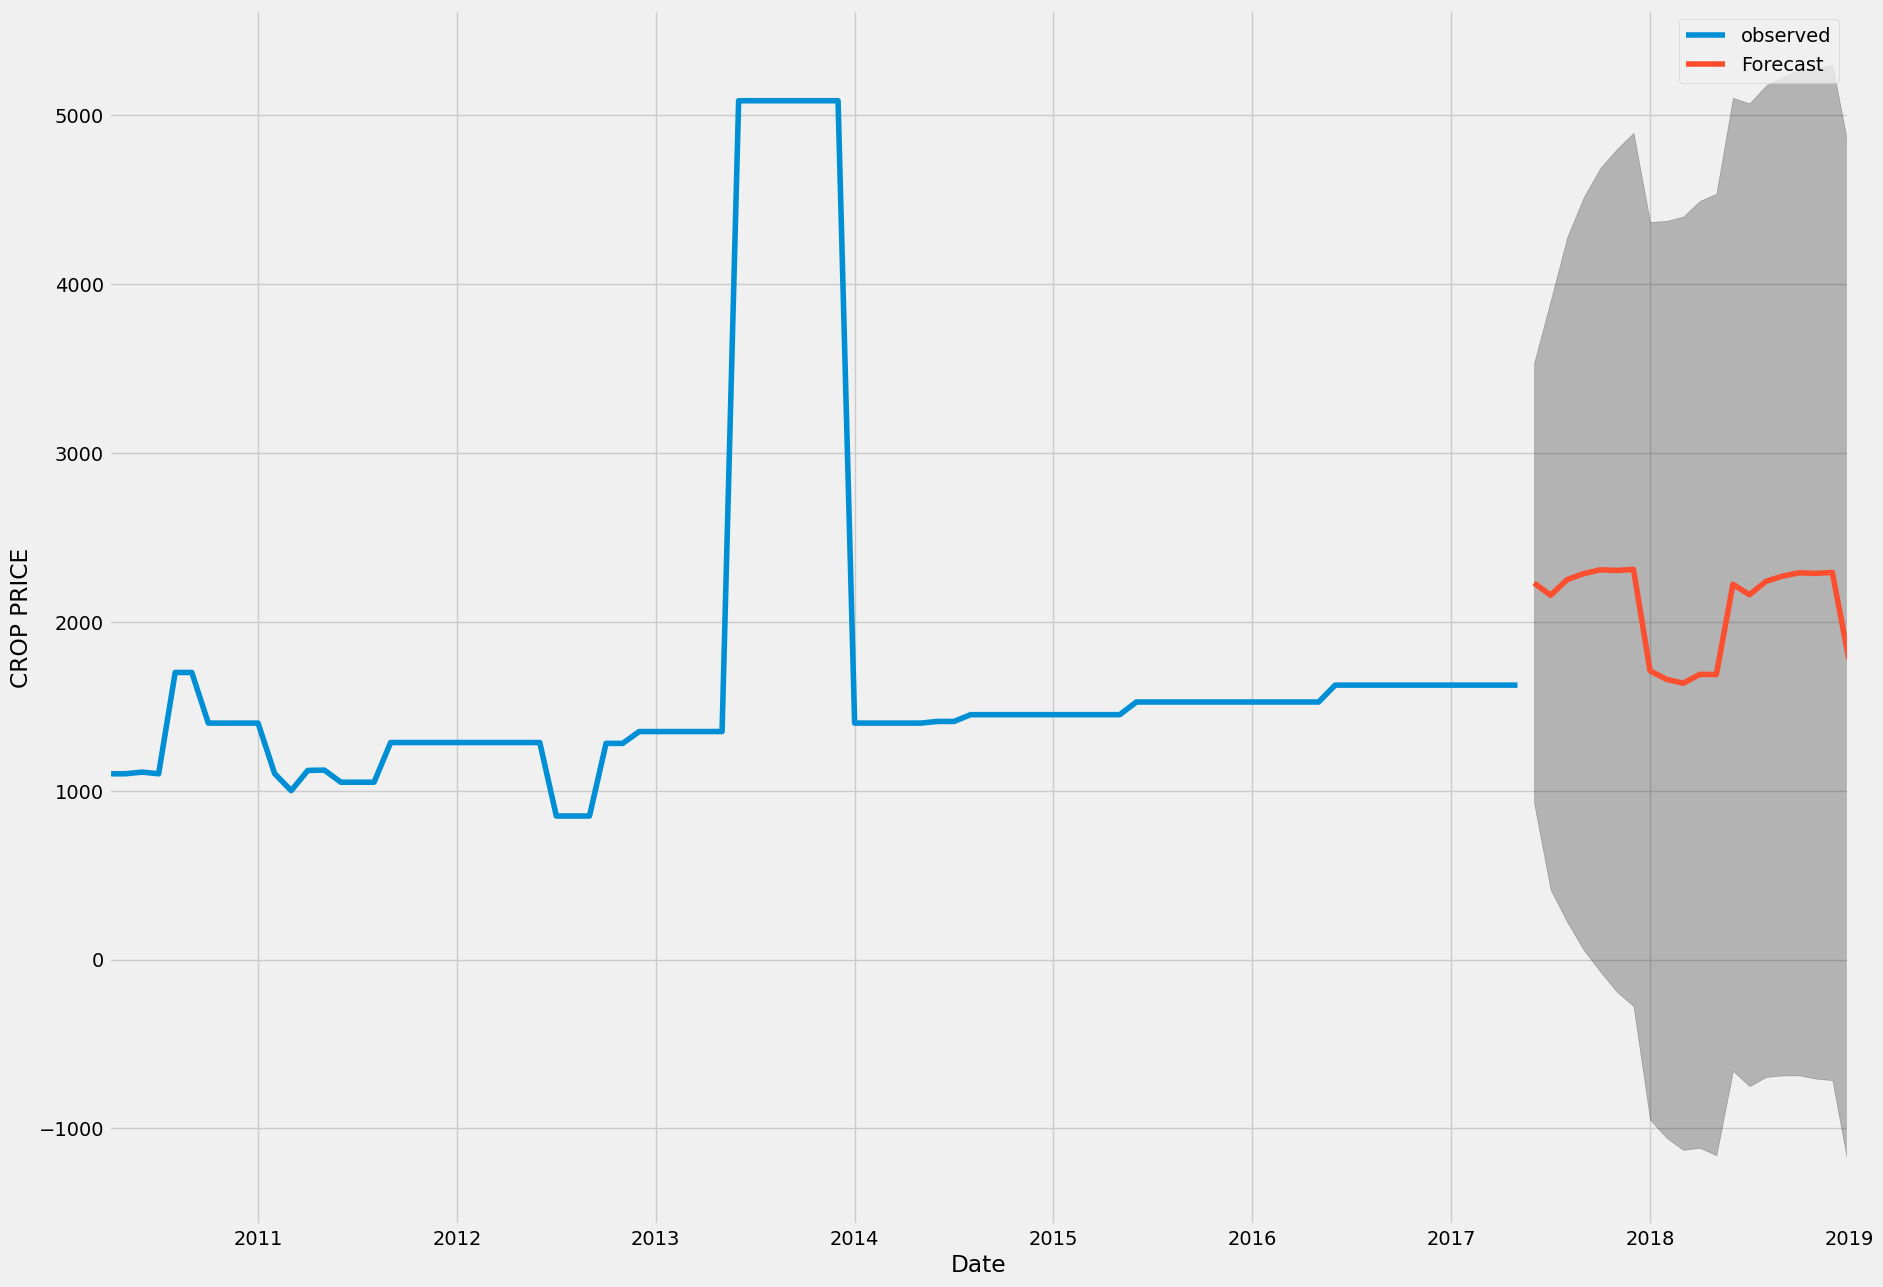

In [27]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()